#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#### Loading the titanic dataset

In [2]:
data = pd.read_csv(r"D:\ICTAK\Assignments and Case Studies\Assignment 06\titanic_dataset .csv")

#### Displaying the head of the dataset

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Getting the shape of the dataset

In [4]:
data.shape

(891, 12)

#### Getting the info of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Showing the datatypes of the dataset

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Finding the null values in the dataset

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### <font color = violet> There are null values in three columns of the dataset.

##### <font color = orange> We can categorized the people on the basis of their salutations and then fill the missing values in the column "Age" by respective of median in the salutation's group. 

#### Creating new column to categorize people on the basis of their salutations

In [8]:
data['Salutation'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

#### Grouping the dataset by the column "Salutation"

In [9]:
grp = data.groupby(['Salutation'])

#### Filling the missing value in the "Age" column

In [10]:
data['Age'] = grp.Age.apply(lambda x: x.fillna(x.median()))

#### Filling the missing value in the "Embarked" column by its mode

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#### Getting the percentage of missing values in the column "Cabin"

In [12]:
np.round(data['Cabin'].isna().mean()*100,2)

77.1

##### <font color = violet> Since the missing values in the column 'Cabin' is more than three-fourth of the number of observation, we can drop this column.

#### Dropping the column "Cabin" from the dataset

In [13]:
data.drop('Cabin', axis = 1, inplace = True)

#### Dropping irrevelant columns from the dataset

In [14]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Salutation', 'Fare'], axis = 1, inplace = True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### Finding whether there is anymore null values in the dataset

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

#### Displaying the statistical summary of the dataset

In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.390202,0.523008,0.381594
std,0.486592,0.836071,13.265322,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


#### Finding outliers in the numerical columns of the dataset using boxplot

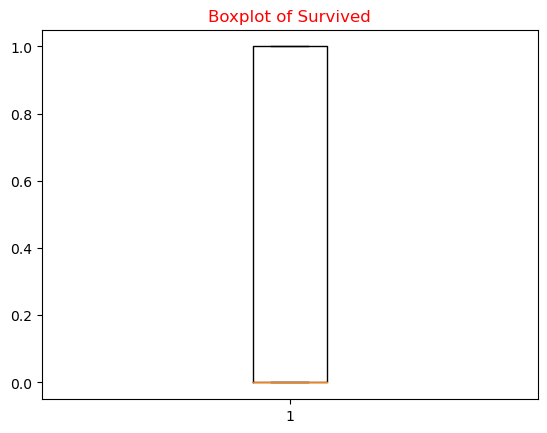

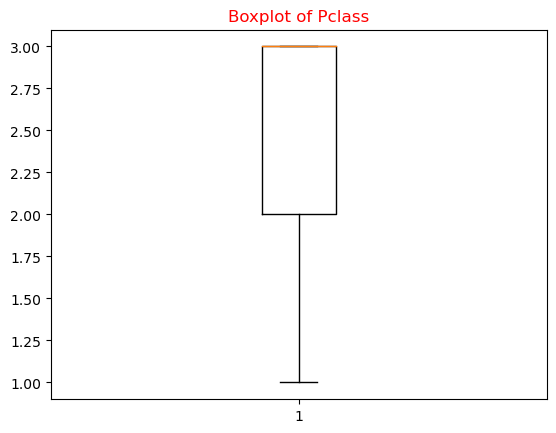

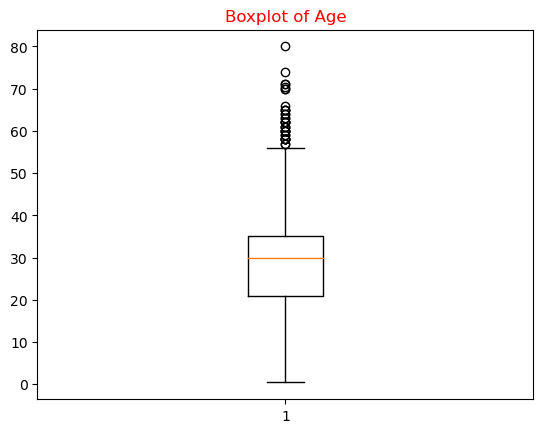

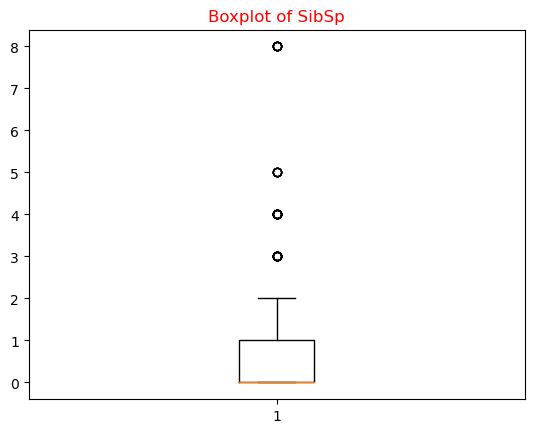

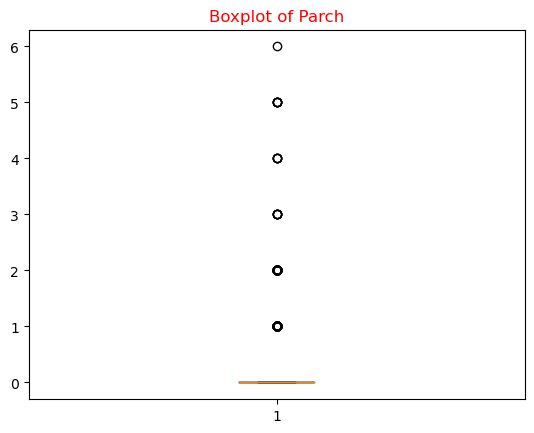

In [18]:
num_col = data.select_dtypes(include=['float', 'int'])
for col in num_col:
    plt.figure()
    plt.boxplot(data[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

##### <font color = violet> There are three columns with outliers in the dataset. For the record let us keep the outliers.

## <font color = brown> One Hot Encoding

In [19]:
data = pd.get_dummies(data)

In [20]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


#### Setting the feature and target variables

In [21]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

###### Splitting training and testing data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

## <font color = brown> k Nearest Neighbor

#### Import KNeighborsClassifiers

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(3,15)

#### Finding the k value with highest accuracy

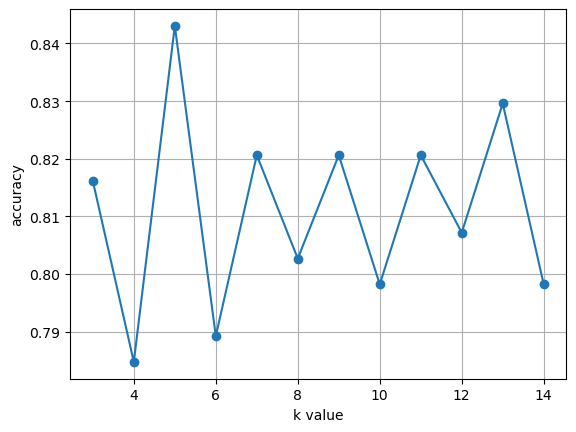

In [24]:
metric = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric.append(acc)
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

##### <font color = violet> We can see that n_neighbor = 5 has most accuracy.

#### Calculating the accuracy of highest k nearest neighbor

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print('Accuracy =', accuracy_score(y_test, y_pred_knn))
print('Precision =', precision_score(y_test, y_pred_knn))
print('Recall =', recall_score(y_test, y_pred_knn))
print('F1 Score =', f1_score(y_test, y_pred_knn))

Accuracy = 0.8430493273542601
Precision = 0.8292682926829268
Recall = 0.7640449438202247
F1 Score = 0.7953216374269005


In [26]:
confusion_matrix(y_test, y_pred_knn)

array([[120,  14],
       [ 21,  68]], dtype=int64)

## <font color = brown> SVM Model

#### Importing SVC from sklearn

In [27]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')

#### Fitting the svm model

In [28]:
svmclf.fit(x_train, y_train)
y_pred_svm = svmclf.predict(x_test)

#### Calculating the accuracy of svm model

In [29]:
print('Accuracy =', accuracy_score(y_test, y_pred_svm))
print('Precision =', precision_score(y_test, y_pred_svm))
print('Recall =', recall_score(y_test, y_pred_svm))
print('F1 Score =', f1_score(y_test, y_pred_svm))

Accuracy = 0.7847533632286996
Precision = 0.7411764705882353
Recall = 0.7078651685393258
F1 Score = 0.7241379310344828


In [30]:
confusion_matrix(y_test, y_pred_svm)

array([[112,  22],
       [ 26,  63]], dtype=int64)

## <font color = brown> K-fold Cross Validation

#### Importing KFold and cross_val_score from sklearn

In [31]:
from sklearn.model_selection import KFold, cross_val_score
kfold_vldr = KFold(20)

#### Finding the average accuracy score of knn model using k-fold cross validation 

In [34]:
cv_result_knn = cross_val_score(knn, x, y, cv = kfold_vldr)
print('The average accuracy score of knn model using k-fold cross validation is', np.mean(cv_result_knn))

The average accuracy score of knn model using k-fold cross validation is 0.7969949494949495


#### Finding the average accuracy score of svm model using k-fold cross validation

In [36]:
cv_result_svm = cross_val_score(svmclf, x, y, cv = kfold_vldr)
print('The average accuracy score of svm model using k-fold cross validation is', np.mean(cv_result_svm))

The average accuracy score of svm model using k-fold cross validation is 0.7865909090909091


## <font color = brown> Stratified Cross Validation

#### Importing StratifiedKFold from sklearn

In [37]:
from sklearn.model_selection import StratifiedKFold
skfold_vldr = StratifiedKFold(n_splits = 20)

#### Finding the average accuracy score of knn model using Stratified k-fold cross validation 

In [38]:
skfold_cv_result_knn = cross_val_score(knn, x, y, cv = skfold_vldr)
print('The average accuracy score of knn model using stratified k-fold cross validation is', np.mean(skfold_cv_result_knn))

The average accuracy score of knn model using stratified k-fold cross validation is 0.7947222222222222


#### Finding the average accuracy score of knn model using Stratified k-fold cross validation 

In [39]:
skfold_cv_result_svm = cross_val_score(svmclf, x, y, cv = skfold_vldr)
print('The average accuracy score of svm model using stratified k-fold cross validation is', np.mean(skfold_cv_result_svm))

The average accuracy score of svm model using stratified k-fold cross validation is 0.7865656565656565


### <font color = red> We can see that the knn model using hold-out validation technique has highest accuracy.